# COGS 108 - EDA Checkpoint


## Names


*   Connor McManigal
*   Ryan Swartz
*   Matthew Cohen
*   Xuwen Yan(Ella)
*   Egor Pustovalov



# Research Question
Is there an association between an NBA team’s number and rank of injured players to their record from the 2010 season through the 2015 season? Also, can we accurately predict a team’s change in record based on injuries that occur in future seasons?




## Setup
Two files containing the datasets are required for this notebook. The links to them are provided in the data cleaning section. 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from IPython.display import display_html 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#deal with excel datasets
import pip
pip.main(["install", "openpyxl"])


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

## Data Cleaning
The following section presents information on the data cleaning steps for the two datasets used in this report. 

## First Dataset - Injury Stats
### Link to Dataset: https://www.kaggle.com/datasets/ghopkins/nba-injuries-2010-2018
### No. Observations: 17,408 
This dataset describes the occurance, injury type, player team, and time of injury for NBA players in the 2010 - 2020 years. 

The information present here will be combined with the Historical NBA Performance dataset to match players with their teams for a given year. This will allow us to show how the number of injuries across different players for the same team impacts the team's historical performance. 

In [ ]:
#first dataset - Injury stats
injury = pd.read_csv('injuries_2010-2020.csv')
injury

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)
...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD)
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL


The NBA season roughly goes from October until June. So we are interpretting the column 'Season' as the year the season started ie. any injury happening in the 2015-2016 season will be read as the Season: 2015.

In [ ]:
injury = injury.assign(
    Year = injury.get('Date').apply(lambda s: int(s.split('-')[0]))
)
injury = injury[2010 <= injury.get('Year')]\
                       [(injury[2010 <= injury.get('Year')]).get('Year')<=2016]
injury = injury.assign(
    Season = injury.get('Date').apply(lambda s: int(s.split('-')[0])- np.where(int(s.split('-')[1]) < 9, 1, 0)))
#injury

In [ ]:
#2015-16 season ended June 19, 2016
#index 15819 -> end of 2015 season
injury = injury.iloc[0:15819]
injury

,Date,Team,Acquired,Relinquished,Notes,Year,Season
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010,2010
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010,2010
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,2010,2010
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),2010,2010
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),2010,2010
...,...,...,...,...,...,...,...
15814,2016-06-10,Cavaliers,Kevin Love,NaN,activated from IL,2016,2015
15815,2016-06-13,Warriors,NaN,Ian Clark,placed on IL,2016,2015
15816,2016-06-13,Warriors,James McAdoo,NaN,activated from IL,2016,2015
15817,2016-06-15,Warriors,NaN,Andrew Bogut,left knee injury (out for season),2016,2015


In [ ]:
grouped_by_team_year = injury.groupby(['Season','Team']).count().drop(columns=['Date', 'Year', 'Notes'])
grouped_by_team_year

Acquired  Relinquished
Season Team                                
2010   76ers               26            33
       Blazers             10            48
       Bobcats             52            97
       Bucks               25            98
       Bulls               17            33
...                       ...           ...
2015   Suns                34            48
       Thunder             35            51
       Timberwolves        26            34
       Warriors            49            66
       Wizards             48            61

[181 rows x 2 columns]

In [ ]:
acquired_injury = injury.dropna(subset=['Acquired'])
acquired_injury

,Date,Team,Acquired,Relinquished,Notes,Year,Season
53,2010-10-27,Heat,Jerry Stackhouse,NaN,activated from IL,2010,2010
81,2010-10-27,Rockets,Jermaine Taylor,NaN,activated from IL,2010,2010
101,2010-10-29,Cavaliers,Samardo Samuels,NaN,activated from IL,2010,2010
103,2010-10-29,Celtics,Luke Harangody,NaN,activated from IL,2010,2010
105,2010-10-29,Grizzlies,Marc Gasol,NaN,activated from IL,2010,2010
...,...,...,...,...,...,...,...
15806,2016-05-26,Warriors,James McAdoo,NaN,activated from IL,2016,2015
15808,2016-06-02,Warriors,Brandon Rush,NaN,activated from IL,2016,2015
15811,2016-06-08,Cavaliers,Jordan McRae,NaN,activated from IL,2016,2015
15814,2016-06-10,Cavaliers,Kevin Love,NaN,activated from IL,2016,2015


In [ ]:
acquired_injury.groupby(['Season','Team']).count().drop(columns=['Date','Notes','Relinquished', 'Year'])

Acquired
Season Team                  
2010   76ers               26
       Blazers             10
       Bobcats             52
       Bucks               25
       Bulls               17
...                       ...
2015   Suns                34
       Thunder             35
       Timberwolves        26
       Warriors            49
       Wizards             48

[180 rows x 1 columns]

In [ ]:
relinquished_injury = injury.dropna(subset=['Relinquished'])
relinquished_injury

,Date,Team,Acquired,Relinquished,Notes,Year,Season
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010,2010
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010,2010
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,2010,2010
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),2010,2010
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),2010,2010
...,...,...,...,...,...,...,...
15812,2016-06-08,Jazz,NaN,Alec Burks,arthroscopic surgery on left knee and ankle to...,2016,2015
15813,2016-06-10,Cavaliers,NaN,Jordan McRae,placed on IL,2016,2015
15815,2016-06-13,Warriors,NaN,Ian Clark,placed on IL,2016,2015
15817,2016-06-15,Warriors,NaN,Andrew Bogut,left knee injury (out for season),2016,2015


In [ ]:
relinquished_injury.groupby(['Season','Team']).count().drop(columns=['Date','Notes','Acquired', 'Year'])

Relinquished
Season Team                      
2010   76ers                   33
       Blazers                 48
       Bobcats                 97
       Bucks                   98
       Bulls                   33
...                           ...
2015   Suns                    48
       Thunder                 51
       Timberwolves            34
       Warriors                66
       Wizards                 61

[181 rows x 1 columns]

In [ ]:
knee = injury[injury['Notes'].str.contains("knee")]\
                .groupby(['Season','Team']).count().drop(columns=['Date','Notes', 'Acquired', 'Year'])
knee = knee.rename(columns={"Relinquished": "Knee injuries"})
ankle = injury[injury['Notes'].str.contains("ankle")]\
                .groupby(['Season','Team']).count().drop(columns=['Date','Notes', 'Acquired', 'Year'])
ankle = ankle.rename(columns={"Relinquished": "Ankle injuries"})
foot = injury[injury['Notes'].str.contains("foot")]\
                .groupby(['Season','Team']).count().drop(columns=['Date','Notes', 'Acquired', 'Year'])
foot = foot.rename(columns={"Relinquished": "Foot injuries"})
hand = injury[injury['Notes'].str.contains("hand")]\
                .groupby(['Season','Team']).count().drop(columns=['Date','Notes', 'Acquired', 'Year'])
hand = hand.rename(columns={"Relinquished": "Hand injuries"})
finger = injury[injury['Notes'].str.contains("finger")]\
                .groupby(['Season','Team']).count().drop(columns=['Date','Notes', 'Acquired', 'Year'])
finger = finger.rename(columns={"Relinquished": "Finger injuries"})
back = injury[injury['Notes'].str.contains("back")]\
                .groupby(['Season','Team']).count().drop(columns=['Date','Notes', 'Acquired', 'Year'])
back = back.rename(columns={"Relinquished": "Back injuries"})

knee_styler = knee.head().style.set_table_attributes("style='display:inline'").set_caption('injuries related to knee')
ankle_styler = ankle.head().style.set_table_attributes("style='display:inline'").set_caption('injuries related to ankle')
foot_styler = foot.head().style.set_table_attributes("style='display:inline'").set_caption('injuries related to foot')
finger_styler = finger.head().style.set_table_attributes("style='display:inline'").set_caption('injuries related to finger')
back_styler = back.head().style.set_table_attributes("style='display:inline'").set_caption('injuries related to back')
hand_styler = hand.head().style.set_table_attributes("style='display:inline'").set_caption('injuries related to hand')

display_html(knee_styler._repr_html_()+\
             ankle_styler._repr_html_()+\
             foot_styler._repr_html_()+\
             finger_styler._repr_html_()+\
             back_styler._repr_html_()+\
             hand_styler._repr_html_(), raw=True)

injuries related to knee 
 
 
   
   
 Knee injuries 
 
 
 Season 
 Team 
   
 
 
 
 
 2010 
 76ers 
 2 
 
 
 Blazers 
 23 
 
 
 Bobcats 
 19 
 
 
 Bucks 
 4 
 
 
 Cavaliers 
 3 
 
 
 

 
 injuries related to ankle 
 
 
   
   
 Ankle injuries 
 
 
 Season 
 Team 
   
 
 
 
 
 2010 
 Blazers 
 4 
 
 
 Bobcats 
 6 
 
 
 Bucks 
 5 
 
 
 Bulls 
 6 
 
 
 Cavaliers 
 12 
 
 
 

 
 injuries related to foot 
 
 
   
   
 Foot injuries 
 
 
 Season 
 Team 
   
 
 
 
 
 2010 
 Bucks 
 24 
 
 
 Bulls 
 1 
 
 
 Heat 
 3 
 
 
 Jazz 
 5 
 
 
 Kings 
 7 
 
 
 

 
 injuries related to finger 
 
 
   
   
 Finger injuries 
 
 
 Season 
 Team 
   
 
 
 
 
 2010 
 76ers 
 1 
 
 
 Bulls 
 2 
 
 
 Cavaliers 
 4 
 
 
 Celtics 
 1 
 
 
 Kings 
 1 
 
 
 

 
 injuries related to back 
 
 
   
   
 Back injuries 
 
 
 Season 
 Team 
   
 
 
 
 
 2010 
 76ers 
 1 
 
 
 Blazers 
 1 
 
 
 Bobcats 
 7 
 
 
 Bucks 
 10 
 
 
 Cavaliers 
 12 
 
 
 

 
 injuries related to hand 
 
 
   
   
 Hand injuries 
 
 
 Season 
 Team 
   
 
 
 
 
 2010 
 Blazers 
 1 
 
 
 Heat 
 2 
 
 
 2011 
 Bucks 
 3 
 
 
 Cavaliers 
 2 
 
 
 Clippers 
 2

## Second Dataset - Historical NBA Performance
### Link to Dataset: https://data.world/gmoney/nba-team-records-by-year
### No. Observations: 208
This dataset describes the number of wins, number of losses, and winning percentage of an NBA team in a given year. 

The information present here will be combined with the injury dataset to match players with their teams present in this dataset for a given year. This will allow us to show how the number of injuries across different players for the same team impacts the team's historical performance. 

In [ ]:
#second dataset - Team Performance
performance = pd.read_excel('Historical_NBA_Performance.xlsx')
performance

,Year,Team,Record,Winning Percentage,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2016-17,Celtics,25-15,0.625,NaN,NaN,NaN,NaN,NaN,NaT
1,2015-16,Celtics,48-34,0.585,NaN,NaN,NaN,NaN,NaN,NaT
2,2014-15,Celtics,40-42,0.488,NaN,NaN,NaN,NaN,NaN,NaT
3,2013-14,Celtics,25-57,0.305,NaN,NaN,NaN,NaN,NaN,NaT
4,2012-13,Celtics,41-40,0.506,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
1412,1965-66,Bullets,38-42,0.475,NaN,NaN,NaN,NaN,NaN,NaT
1413,1964-65,Bullets,37-43,0.463,NaN,NaN,NaN,NaN,NaN,NaT
1414,1963-64,Bullets,31-49,0.388,NaN,NaN,NaN,NaN,NaN,NaT
1415,1962-63,Zephyrs,25-55,0.313,NaN,NaN,NaN,NaN,NaN,NaT


Let performance_clean be the clean dataset. 


In [ ]:
performance_clean = performance[['Year', 'Team', 'Record', 'Winning Percentage']]

In [ ]:
performance_clean.get('Team').unique()

array(['Celtics', 'Hawks', 'Blackhawks', 'Nets', 'Hornets', 'Bobcats',
       'Bulls', 'Cavaliers', 'Mavericks', 'Nuggets', 'Pistons',
       'Warriors', 'Rockets', 'Pacers', 'Clippers', 'Braves', 'Lakers',
       'Grizzlies', 'Heat', 'Bucks', 'Timberwolves', 'Pelicans', 'Knicks',
       'Thunder', 'Supersonics', 'Magic', '76ers', 'Nationals', 'Suns',
       'Trail Blazers', 'Kings', 'Royals', 'Spurs', 'Raptors', 'Jazz',
       'Wizards', 'Bullets', 'Zephyrs', 'Packers'], dtype=object)

In [ ]:
performance_clean.head()

,Year,Team,Record,Winning Percentage
0,2016-17,Celtics,25-15,0.625
1,2015-16,Celtics,48-34,0.585
2,2014-15,Celtics,40-42,0.488
3,2013-14,Celtics,25-57,0.305
4,2012-13,Celtics,41-40,0.506


In [ ]:
#drops 2016-17 seasons
performance_clean = performance_clean[performance_clean.Year != "2016-17"]

In [ ]:
#changes Year column to Season column
performance_clean.rename(columns = {'Year': 'Season'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#adds columnn Year using indexing on Season column
def season_to_year(s):
  return s.split('-')[0]
performance_clean['Year'] = performance_clean['Season'].astype(str).apply(season_to_year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#filters Year column to grab Seasons 2010-2016
performance_clean['Year'] = performance_clean['Year'].astype(int)

performance_clean = performance_clean[2010 <= performance_clean.get('Year')]\
                     [(performance_clean[2010 <= performance_clean.get('Year')]).get('Year')<=2016]
performance_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Season,Team,Record,Winning Percentage,Year
1,2015-16,Celtics,48-34,0.585,2015
2,2014-15,Celtics,40-42,0.488,2014
3,2013-14,Celtics,25-57,0.305,2013
4,2012-13,Celtics,41-40,0.506,2012
5,2011-12 *,Celtics,39-27,0.591,2011
...,...,...,...,...,...
1363,2014-15,Wizards,46-36,0.561,2014
1364,2013-14,Wizards,44-38,0.537,2013
1365,2012-13,Wizards,29-53,0.354,2012
1366,2011-12 *,Wizards,20-46,0.303,2011


In [ ]:
#cleans irregular values of Season column for the years 2010-11 and 2011-12
def fix_season(s):
  if (s == '2011-12 *'):
    return '2011-12'
  elif (s == datetime.datetime(2010, 11, 1, 0, 0)):
    return '2010-11'
  else:
    return s

performance_clean['Season'] = performance_clean['Season'].apply(fix_season)
#change season to starting year
# performance_clean['Season'] = performance_clean['Season'].split('-')[0]
performance_clean['Season'] = performance_clean['Season'].apply(lambda x: int(x.split('-')[0]))

In [ ]:
def win(s):
  return s.split('-')[0]
def loss(s):
  return s.split('-')[1]
performance_clean['Win'] = performance_clean['Record'].apply(win)
performance_clean['Loss'] = performance_clean['Record'].apply(loss)
performance_clean.drop(['Record'], axis=1)

,Season,Team,Winning Percentage,Year,Win,Loss
1,2015,Celtics,0.585,2015,48,34
2,2014,Celtics,0.488,2014,40,42
3,2013,Celtics,0.305,2013,25,57
4,2012,Celtics,0.506,2012,41,40
5,2011,Celtics,0.591,2011,39,27
...,...,...,...,...,...,...
1363,2014,Wizards,0.561,2014,46,36
1364,2013,Wizards,0.537,2013,44,38
1365,2012,Wizards,0.354,2012,29,53
1366,2011,Wizards,0.303,2011,20,46


In [ ]:
unique_team_d1=['Celtics', 'Hawks', 'Blackhawks', 'Nets', 'Hornets', 'Bobcats',
       'Bulls', 'Cavaliers', 'Mavericks', 'Nuggets', 'Pistons',
       'Warriors', 'Rockets', 'Pacers', 'Clippers', 'Braves', 'Lakers',
       'Grizzlies', 'Heat', 'Bucks', 'Timberwolves', 'Pelicans', 'Knicks',
       'Thunder', 'Supersonics', 'Magic', '76ers', 'Nationals', 'Suns',
       'Trail Blazers', 'Kings', 'Royals', 'Spurs', 'Raptors', 'Jazz',
       'Wizards', 'Bullets', 'Zephyrs', 'Packers']

unique_team_d2=['Bulls', 'Pistons', 'Blazers', 'Nets', 'Nuggets', 'Bucks', 'Kings',
 'Bobcats', 'Warriors', 'Suns', 'Heat', 'Thunder', 'Timberwolves',
 'Celtics', 'Lakers', 'Rockets', '76ers', 'Cavaliers', 'Clippers',
 'Grizzlies', 'Hawks', 'Hornets', 'Jazz', 'Knicks', 'Mavericks',
 'Pacers', 'Raptors', 'Spurs', 'Magic', 'Wizards', 'Pelicans',
 'Bullets']

d1_as_set = set(unique_team_d1)
intersection = d1_as_set.intersection(unique_team_d2)

unique_teams = list(intersection)
#unique_teams

To combine our two datasets: we will be linking the season columns together. For the injury dataset, this will be the start year of the season (ie 2010), and for the performance dataset, this will be the range (2010-11).

## Data Analysis & Results 



In [ ]:
injuries2 = pd.merge(grouped_by_team_year, knee, how='left', on=['Season', 'Team'])
injuries3= pd.merge(injuries2, ankle, how='left', on=['Season', 'Team'])
injuries4 = pd.merge(injuries3, foot, how='left', on=['Season', 'Team'])
injuries5 = pd.merge(injuries4, finger, how='left', on=['Season', 'Team'])
injuries6 = pd.merge(injuries5, back, how='left', on=['Season', 'Team'])
injuries7 = pd.merge(injuries6, hand, how='left', on=['Season', 'Team'])
merged_data = pd.merge(injuries7, performance_clean, how='right', on=['Season', 'Team'])

In [ ]:
merged_data['Knee injuries'] = merged_data['Knee injuries'].fillna(0)
merged_data['Ankle injuries'] = merged_data['Ankle injuries'].fillna(0)
merged_data['Foot injuries'] = merged_data['Foot injuries'].fillna(0)
merged_data['Finger injuries'] = merged_data['Finger injuries'].fillna(0)
merged_data['Back injuries'] = merged_data['Back injuries'].fillna(0)
merged_data['Hand injuries'] = merged_data['Hand injuries'].fillna(0) 

In [ ]:
merged_data #year and season are both included

,Season,Team,Acquired,Relinquished,Knee injuries,Ankle injuries,Foot injuries,Finger injuries,Back injuries,Hand injuries,Record,Winning Percentage,Year,Win,Loss
0,2015,Celtics,42.0,52.0,2.0,4.0,1.0,0.0,2.0,0.0,48-34,0.585,2015,48,34
1,2014,Celtics,28.0,36.0,1.0,6.0,1.0,1.0,1.0,2.0,40-42,0.488,2014,40,42
2,2013,Celtics,6.0,99.0,54.0,26.0,0.0,0.0,0.0,0.0,25-57,0.305,2013,25,57
3,2012,Celtics,7.0,46.0,8.0,15.0,0.0,0.0,2.0,0.0,41-40,0.506,2012,41,40
4,2011,Celtics,28.0,68.0,10.0,10.0,2.0,0.0,3.0,0.0,39-27,0.591,2011,39,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2014,Wizards,33.0,43.0,3.0,3.0,2.0,0.0,3.0,1.0,46-36,0.561,2014,46,36
175,2013,Wizards,13.0,53.0,18.0,2.0,7.0,3.0,4.0,0.0,44-38,0.537,2013,44,38
176,2012,Wizards,13.0,99.0,20.0,16.0,5.0,0.0,2.0,12.0,29-53,0.354,2012,29,53
177,2011,Wizards,5.0,68.0,18.0,2.0,24.0,1.0,1.0,2.0,20-46,0.303,2011,20,46


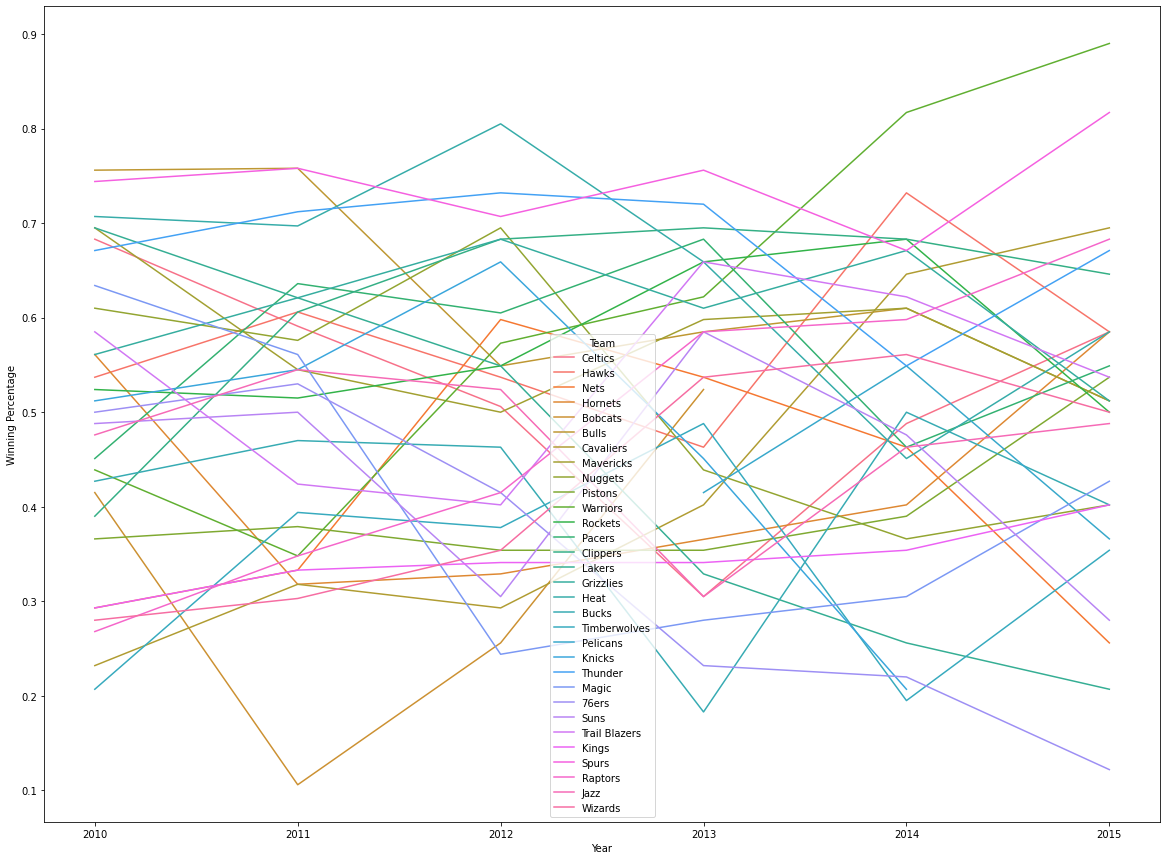

In [ ]:
#Plot winning vs losing record for each team 2010-2015 seasons - by win percentage and year(for each Team)
#x-axis: year
#y-axis: Winning Percentage
plt.figure(figsize=(20,15))
sns.lineplot(data=merged_data.drop(columns=['Relinquished']), x = "Year", y = "Winning Percentage", hue = "Team")


The graph above shows how the winning percentage (record) for each team changed over time. It is typical to have some teams stay consistent over a few year period if they have star players under contract, but others may fluctuate due to lose players during free agency or to injury.

In [ ]:
#create the difference column
avg = merged_data.groupby(['Team','Season']).sum().get('Winning Percentage')/merged_data.groupby(['Team','Season']).count().get('Winning Percentage')
avg1 = avg.groupby(['Team']).sum()/6
difference = merged_data.drop_duplicates().groupby(['Team','Season']).sum().get('Winning Percentage') - avg1
difference = pd.DataFrame(difference).reset_index().get('Winning Percentage')
difference

#add the Difference column back to the dataset
merged_data = merged_data.assign(Difference = difference)
merged_data


,Season,Team,Acquired,Relinquished,Knee injuries,Ankle injuries,Foot injuries,Finger injuries,Back injuries,Hand injuries,Record,Winning Percentage,Year,Win,Loss,Difference
0,2015,Celtics,42.0,52.0,2.0,4.0,1.0,0.0,2.0,0.0,48-34,0.585,2015,48,34,0.1635
1,2014,Celtics,28.0,36.0,1.0,6.0,1.0,1.0,1.0,2.0,40-42,0.488,2014,40,42,0.1935
2,2013,Celtics,6.0,99.0,54.0,26.0,0.0,0.0,0.0,0.0,25-57,0.305,2013,25,57,0.0785
3,2012,Celtics,7.0,46.0,8.0,15.0,0.0,0.0,2.0,0.0,41-40,0.506,2012,41,40,-0.1045
4,2011,Celtics,28.0,68.0,10.0,10.0,2.0,0.0,3.0,0.0,39-27,0.591,2011,39,27,-0.1165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2014,Wizards,33.0,43.0,3.0,3.0,2.0,0.0,3.0,1.0,46-36,0.561,2014,46,36,-0.1195
175,2013,Wizards,13.0,53.0,18.0,2.0,7.0,3.0,4.0,0.0,44-38,0.537,2013,44,38,-0.0685
176,2012,Wizards,13.0,99.0,20.0,16.0,5.0,0.0,2.0,12.0,29-53,0.354,2012,29,53,0.1145
177,2011,Wizards,5.0,68.0,18.0,2.0,24.0,1.0,1.0,2.0,20-46,0.303,2011,20,46,0.1385


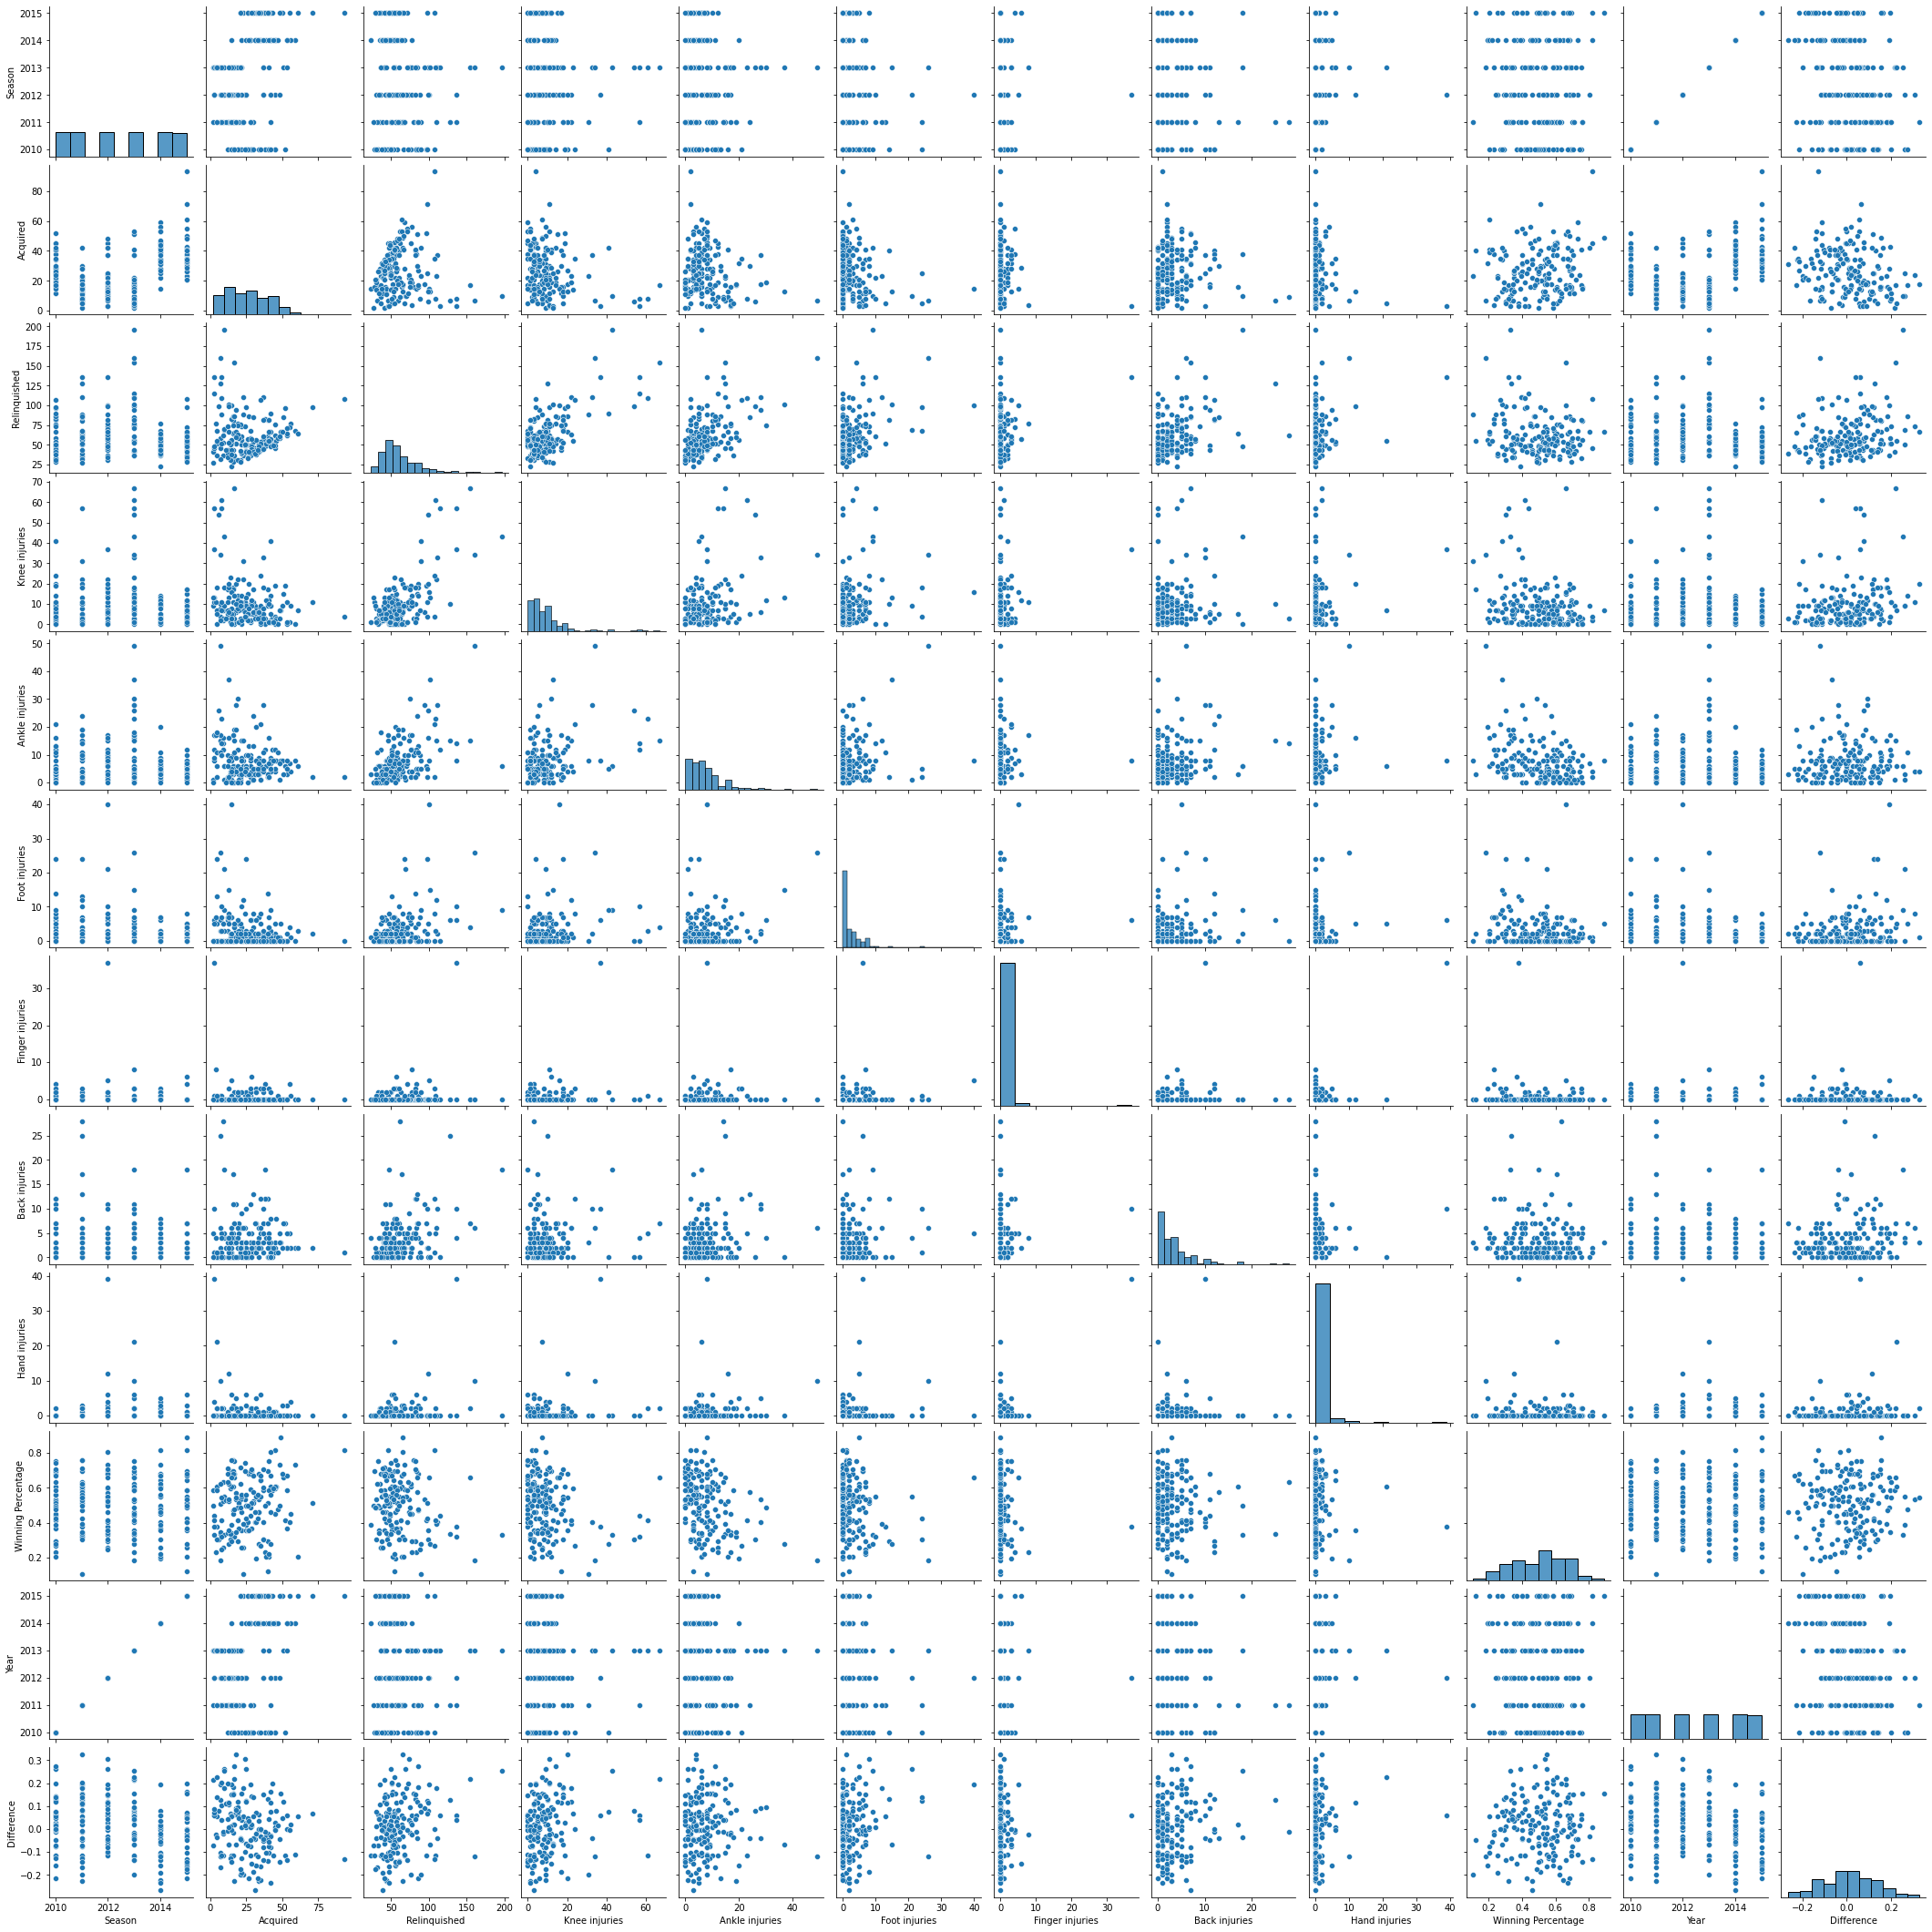

In [ ]:
#generate a pairplot of merged_data and all its data
sns.pairplot(merged_data)
plt.show()

The graph above shows a combination of the merged data from the data fram above. It is a combination of different x and y axis values as can be seen on the left side and bottom.

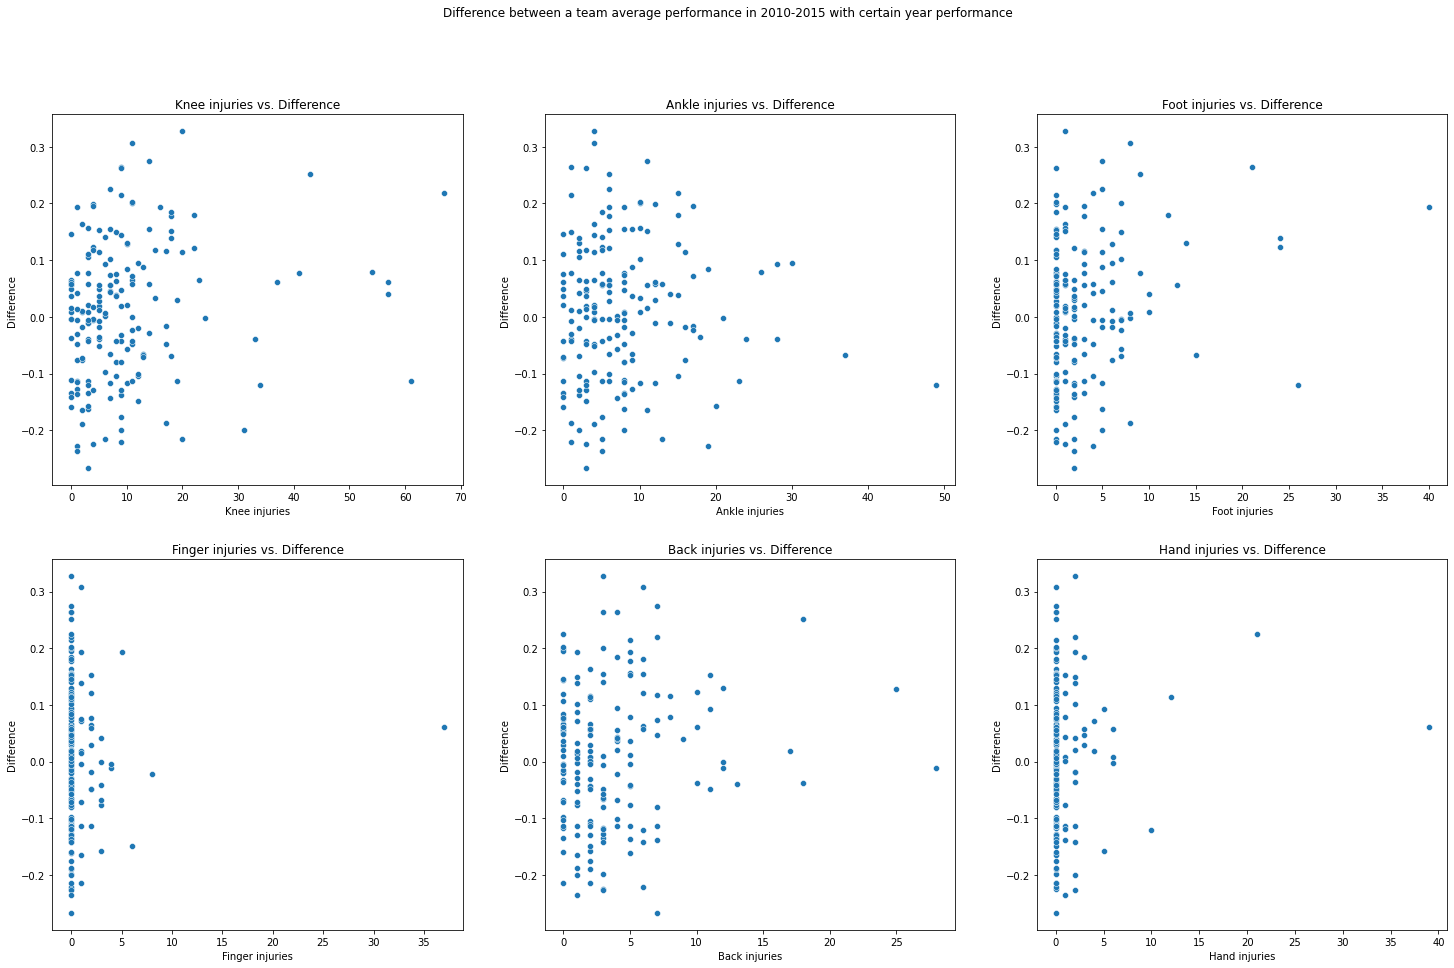

In [ ]:
#Difference between team average performance in 2010-2015 with year performance 
#x-axis: injury type
#y-axis: Difference
fig, axes = plt.subplots(2, 3, figsize=(25, 15))

fig.suptitle('Difference between a team average performance in 2010-2015 with certain year performance')
ax=sns.scatterplot(ax=axes[0, 0],data=merged_data, x="Knee injuries", y="Difference")
ax.set_title("Knee injuries vs. Difference")
ax=sns.scatterplot(ax=axes[0, 1],data=merged_data, x="Ankle injuries", y="Difference")
ax.set_title("Ankle injuries vs. Difference")
ax=sns.scatterplot(ax=axes[0, 2],data=merged_data, x="Foot injuries", y="Difference")
ax.set_title("Foot injuries vs. Difference")
ax=sns.scatterplot(ax=axes[1, 0],data=merged_data, x="Finger injuries", y="Difference")
ax.set_title("Finger injuries vs. Difference")
ax=sns.scatterplot(ax=axes[1, 1],data=merged_data, x="Back injuries", y="Difference")
ax.set_title("Back injuries vs. Difference")
ax=sns.scatterplot(ax=axes[1, 2],data=merged_data, x="Hand injuries", y="Difference")
ax.set_title("Hand injuries vs. Difference")

f1 = plt.gcf()


The above graphs plot the number of each type of injury against their win percentage relative to the average win percentage of the team (Difference). We could see that knee and ankle injuries were more and had a greater effect. We also see that most of the dots are grouped by 0 types of injuries.

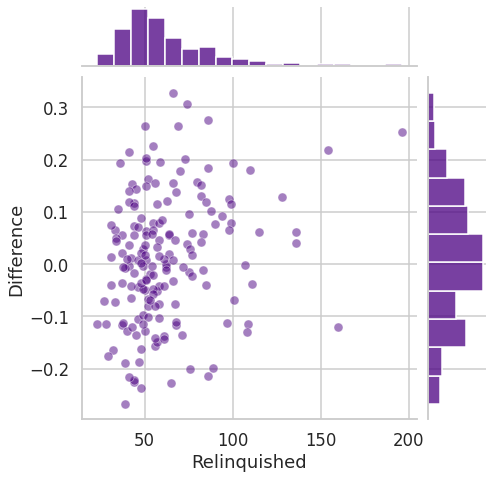

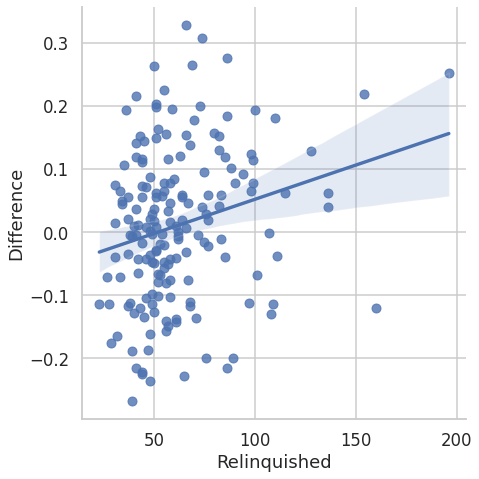

In [ ]:
#take a look at the relationship between Difference and the overall number of injuries
#x-axis: Relinquished
#y-axis: Difference
sns.set() 
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x = merged_data['Relinquished'], y = merged_data['Difference'], height = 7, color = 'indigo', alpha = 0.5 )
sns.lmplot(x ='Relinquished', y ='Difference', data = merged_data, height = 7) 
plt.show()

The graphs above show the relationship between the total number of injuries (Relinquished) against their win percentage relative to the field (Difference). Most who had a larger amount of injuries did better, but there were some who went against this trend ie. quite a few outliers. But the trend goes against our hypothesis, so this would definitely support that the null-hypothesis is true.

In [ ]:
#create merged_data_sumed dataframe using the injury types to make All_injuries column
merged_data_sumed = merged_data.assign(All_Injuries = merged_data['Knee injuries'] + merged_data['Ankle injuries'] + merged_data['Foot injuries'] + merged_data['Finger injuries'] + merged_data['Back injuries'] + merged_data['Hand injuries'])
merged_data_sumed.head(13)

,Season,Team,Acquired,Relinquished,Knee injuries,Ankle injuries,Foot injuries,Finger injuries,Back injuries,Hand injuries,Record,Winning Percentage,Year,Win,Loss,Difference,All_Injuries
0,2015,Celtics,42.0,52.0,2.0,4.0,1.0,0.0,2.0,0.0,48-34,0.585,2015,48,34,0.163500,9.0
1,2014,Celtics,28.0,36.0,1.0,6.0,1.0,1.0,1.0,2.0,40-42,0.488,2014,40,42,0.193500,12.0
2,2013,Celtics,6.0,99.0,54.0,26.0,0.0,0.0,0.0,0.0,25-57,0.305,2013,25,57,0.078500,80.0
3,2012,Celtics,7.0,46.0,8.0,15.0,0.0,0.0,2.0,0.0,41-40,0.506,2012,41,40,-0.104500,25.0
4,2011,Celtics,28.0,68.0,10.0,10.0,2.0,0.0,3.0,0.0,39-27,0.591,2011,39,27,-0.116500,25.0
5,2010,Celtics,27.0,86.0,20.0,13.0,0.0,1.0,0.0,0.0,56-26,0.683,2010,56,26,-0.214500,34.0
6,2015,Hawks,43.0,51.0,4.0,12.0,0.0,0.0,0.0,0.0,48-34,0.585,2015,48,34,0.198167,16.0
7,2014,Hawks,59.0,68.0,0.0,8.0,0.0,0.0,2.0,0.0,60-22,0.732,2014,60,22,-0.110833,10.0
8,2013,Hawks,22.0,74.0,8.0,15.0,0.0,0.0,9.0,0.0,38-44,0.463,2013,38,44,0.039167,32.0
9,2012,Hawks,24.0,74.0,11.0,4.0,8.0,1.0,6.0,0.0,44-38,0.537,2012,44,38,0.307167,30.0


In [ ]:
#create grouped_merged_data dataframe that contains the average column values per team 
grouped_merged_data = merged_data_sumed.groupby('Team').sum()
grouped_merged_data['Winning Percentage'] = grouped_merged_data['Winning Percentage'].apply(lambda x: x/6)
grouped_merged_data.head(5)

,Season,Acquired,Relinquished,Knee injuries,Ankle injuries,Foot injuries,Finger injuries,Back injuries,Hand injuries,Winning Percentage,Year,Difference,All_Injuries
Team,,,,,,,,,,,,,
76ers,12075,125.0,312.0,56.0,36.0,21.0,9.0,13.0,0.0,0.336500,12075,2.220446e-16,135.0
Bobcats,8046,93.0,276.0,59.0,42.0,10.0,0.0,10.0,2.0,0.216833,8046,-4.466667e-01,123.0
Bucks,12075,141.0,499.0,93.0,83.0,55.0,0.0,27.0,13.0,0.407500,12075,7.633333e-02,271.0
Bulls,12075,127.0,335.0,44.0,29.0,23.0,2.0,22.0,1.0,0.628333,12075,5.333333e-01,121.0
Cavaliers,12075,186.0,435.0,72.0,74.0,8.0,6.0,33.0,2.0,0.431000,12075,-4.596667e-01,195.0


In [ ]:
winningPercentage = [x * 100 for x in grouped_merged_data['Winning Percentage'] ]
allInjuries = grouped_merged_data['All_Injuries']
acquired = grouped_merged_data['Acquired']
relinquished = grouped_merged_data['Relinquished']

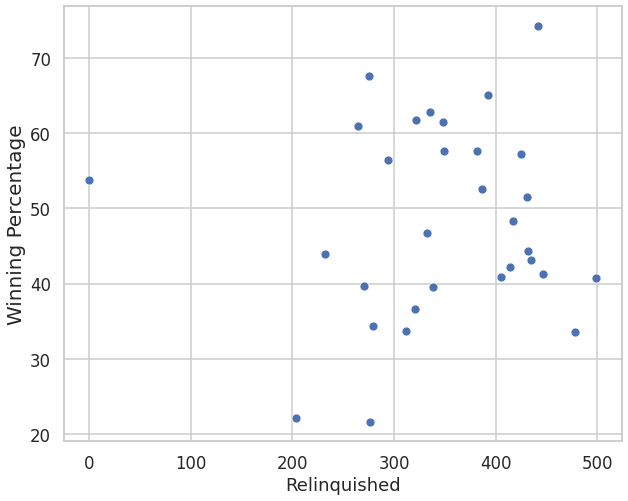

In [ ]:
#scatterplot of the Winning Percentage and Relinquished
#x-axis: Relinquished
#y-axis: Winning Percentage
plt.figure(figsize=(10,8))
plot = sns.scatterplot(x=relinquished, y=winningPercentage)
temp = plot.set_ylabel("Winning Percentage", fontsize = 20)

The graph above shows the relationship between the total number of injuries (Relinquished) against their win percentage. There was a good balance between those who had a good season vs bad season with the same number of injuries.

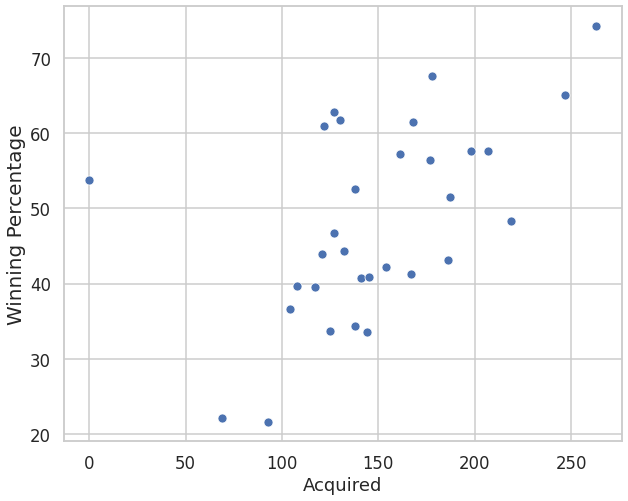

In [ ]:
#scatterplot of Winning Percetqage and Acquired
#x-axis: Acquired
#y-axis: Winning Percentage
plt.figure(figsize=(10,8))
plot = sns.scatterplot(x=acquired, y=winningPercentage)
temp = plot.set_ylabel("Winning Percentage", fontsize = 20)

The graph above shows the relationship between the total number of players returning from injuries (Aquired) against their win percentage. Teams that got more players back from injury ended up having better records.

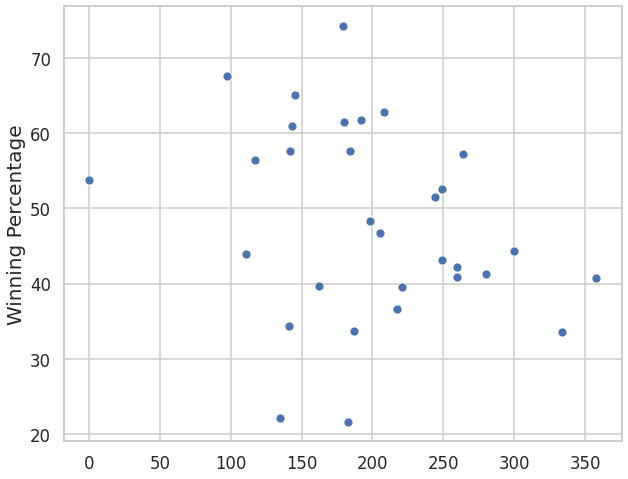

In [ ]:
#scatterplot of the Winning Percentage and Relinquished - Acquired = net injuries
#x-axis: Relinquished - Acquired
#y-axis: Winning Percentage
plt.figure(figsize=(10,8))
net_injuries = relinquished - acquired
plot = sns.scatterplot(x=net_injuries, y=winningPercentage)
temp = plot.set_ylabel("Winning Percentage", fontsize = 20)

The graph above shows the relationship between the difference between reliquished and aquired against their win percentage. Teams that got less players back from injury (large x axis values) ended up having a worse record, but the best fit line is not very strong; there are many outliers and the error would be pretty high.

In [ ]:
import patsy
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Are the amount of injuries in a team correlated to the winning percentage over all years?
# The summary shows that it is not at all. 
outcome, predictors = patsy.dmatrices('winningPercentage ~ relinquished')
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      winningPercentage   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.1430
Date:                Fri, 20 May 2022   Prob (F-statistic):              0.708
Time:                        22:27:10   Log-Likelihood:                -122.69
No. Observations:                  31   AIC:                             249.4
Df Residuals:                      29   BIC:                             252.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.0049      8.711      5.167   

In [ ]:
# Is the amount of players a team acquired correlated to the winning percentage over all years? 
# The summary shows that this is slightly more probably, but there is no significant correlation. 
outcome, predictors = patsy.dmatrices('winningPercentage ~ acquired')
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      winningPercentage   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     10.83
Date:                Fri, 20 May 2022   Prob (F-statistic):            0.00263
Time:                        22:27:10   Log-Likelihood:                -117.84
No. Observations:                  31   AIC:                             239.7
Df Residuals:                      29   BIC:                             242.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7555      6.235      4.612      0.0

Here, we see that we have very small error values for the intercept and acquired. This suppports the claim that people that have more people returning from injuries have a better winning percentage. This does not support our hypothesis that the more injured players a team has, the team's winning percentage will be lower. Since for the regression statistics above (Relinquished vs performance), we see that we have a very high error and therefore our hypothesis is not supported.